In [2]:
import os

# Получить путь к текущей рабочей директории
current_dir = os.getcwd()

# Получить путь к родительской директории
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Изменить текущую рабочую директорию на родительскую директорию
os.chdir(parent_dir)

import pandas as pd
from utils import tokenize_with_hex_replacement
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



Matplotlib created a temporary cache directory at /tmp/matplotlib-hczpue7z because the default path (/ephemeral/abaichorov/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
df_train = pd.read_parquet('data/train.parquet')
df_val = pd.read_parquet('data/val.parquet')
df = pd.concat([df_train, df_val], ignore_index=True)

df['opcode'] = df.opcode.apply(lambda x : tokenize_with_hex_replacement(x) )


In [ ]:
model = Word2Vec(sentences=df['opcode'], vector_size=512, window=60, min_count=2, workers=4)
model.save("models_serialized/word2vec_512.model")

In [45]:
pd.DataFrame(model.wv.most_similar('push32'), columns=['opcode', 'similarity'])

,opcode,similarity
0,dup3,0.343570
1,push20,0.327811
2,dup2,0.187749
3,push26,0.186336
4,push17,0.176687
5,push24,0.176532
6,mstore,0.171505
7,push12,0.170017
8,push1,0.167372
9,mload,0.166441


In [46]:
pd.DataFrame(model.wv.most_similar('HEX_CONST'), columns=['opcode', 'similarity'])

,opcode,similarity
0,jump,0.261287
1,caller,0.220300
2,jumpdest,0.171362
3,sload,0.150147
4,push2,0.142955
5,timestamp,0.141447
6,push31,0.140874
7,eq,0.129534
8,swap13,0.103130
9,dup3,0.098063


In [47]:
pd.DataFrame(model.wv.most_similar('call'), columns=['opcode', 'similarity'])

,opcode,similarity
0,staticcall,0.805136
1,delegatecall,0.696634
2,basefee,0.349633
3,dup8,0.322022
4,extcodecopy,0.312773
5,create,0.281557
6,extcodesize,0.262777
7,address,0.223931
8,dup7,0.218196
9,difficulty,0.205819


In [48]:
pd.DataFrame(model.wv.most_similar('jumpdest'), columns=['opcode', 'similarity'])

,opcode,similarity
0,push2,0.361342
1,pop,0.317832
2,push31,0.256782
3,jump,0.227864
4,byte,0.208950
5,push28,0.184108
6,log0,0.181312
7,swap16,0.175517
8,HEX_CONST,0.171362
9,swap14,0.164070


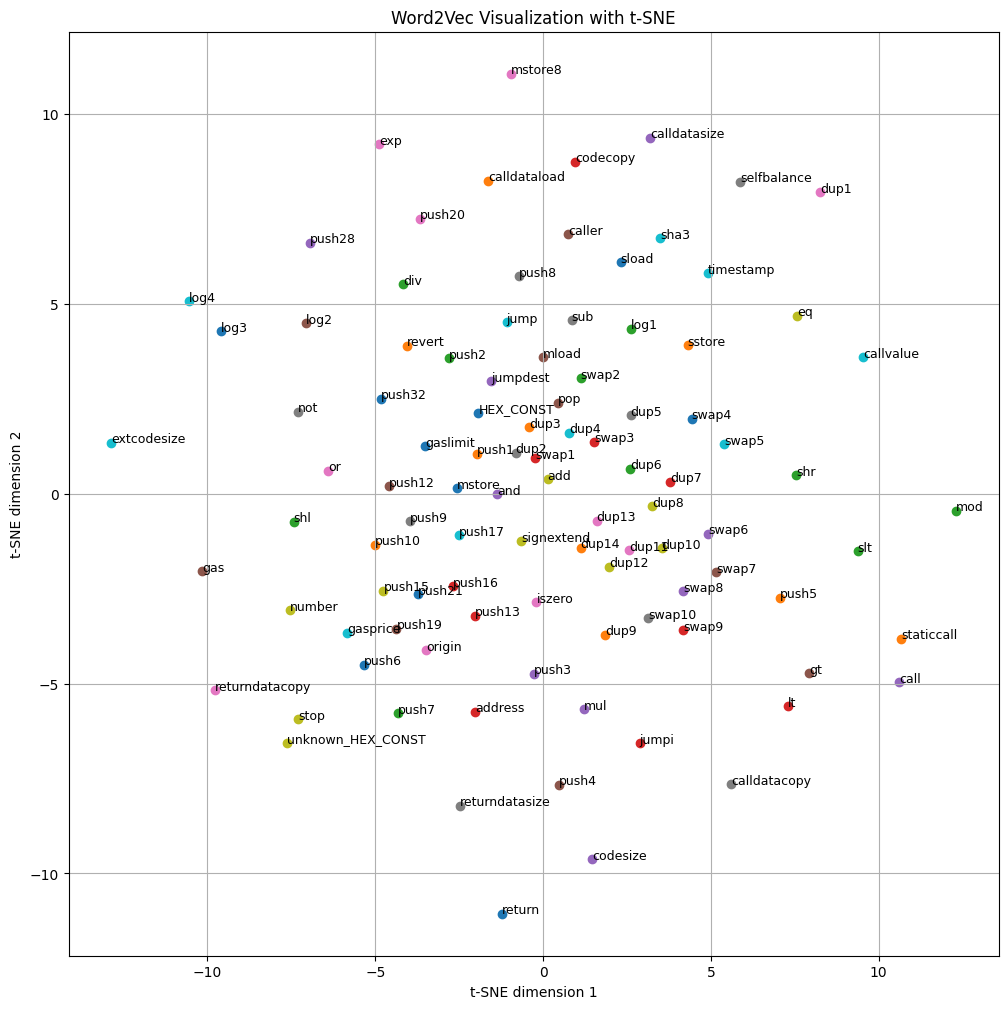

In [49]:
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

tsne = TSNE(n_components=2, random_state=0, perplexity=40, max_iter=300)
word_vecs_2d = tsne.fit_transform(word_vectors[:100])  # Оставляем 100 слов для наглядности

plt.figure(figsize=(12, 12))
for i, word in enumerate(words[:100]):
    plt.scatter(word_vecs_2d[i, 0], word_vecs_2d[i, 1])
    plt.annotate(word, (word_vecs_2d[i, 0], word_vecs_2d[i, 1]), fontsize=9)

plt.title("Word2Vec Visualization with t-SNE")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.grid(True)
plt.show()
